Este programa detecta las mezclas anomalas de concreto utilizando un isolation forest

In [12]:
import pandas as pd
import os
from sklearn.ensemble import IsolationForest

In [ ]:
#Se busca la ruta del archivo, se carga en un dataframe la tabla PRODUCCION
archivo1 = "CONCRETERA 1.1.xlsx"

df = pd.read_excel(archivo1, sheet_name="PRODUCCION_T")

print(df.head)

In [30]:
#selecciona las columnas on valores relevantes
columnas_usar = ["CANTIDAD_M3", "MAT005", "MAT004", "MAT006", "MAT007", "MAT001", "MAT002"]
df_anomalias = df[columnas_usar]
# Copiamos el DataFrame original para no modificarlo directamente
df_anomalias = df[["CANTIDAD_M3", "ID_MEZCLA", "MAT005", "MAT004", "MAT006", "MAT007", "MAT001", "MAT002"]].copy()

# Aplicamos One-Hot Encoding a la columna ID_MEZCLA
df_anomalias = pd.get_dummies(df_anomalias, columns=["ID_MEZCLA"], drop_first=True)


In [31]:
#se aplica el modelo isolation forest
modelo_iso = IsolationForest(contamination=0.05, random_state=42)  # 0.1 = 10% se consideran anómalos
modelo_iso.fit(df_anomalias)

df["ANOMALO"] = modelo_iso.predict(df_anomalias)

In [ ]:
#se muestran las mezclas anomalas
anomalas = df[df["ANOMALO"] == -1]
print(anomalas)


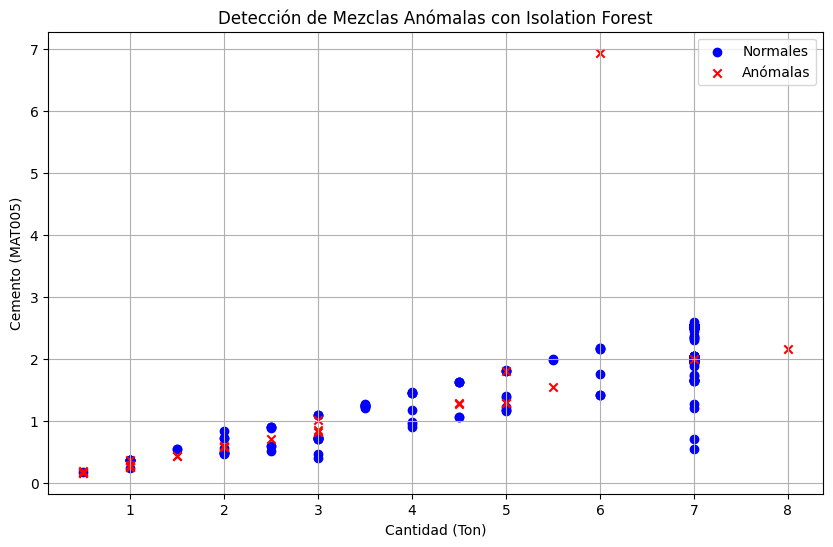

In [33]:
import matplotlib.pyplot as plt

# Creamos dos DataFrames separados
normales = df[df["ANOMALO"] == 1]
anomalas = df[df["ANOMALO"] == -1]

# Graficamos
plt.figure(figsize=(10, 6))
plt.scatter(normales["CANTIDAD_M3"], normales["MAT005"], c='blue', label='Normales')
plt.scatter(anomalas["CANTIDAD_M3"], anomalas["MAT005"], c='red', label='Anómalas', marker='x')

plt.xlabel("Cantidad (Ton)")
plt.ylabel("Cemento (MAT005)")
plt.title("Detección de Mezclas Anómalas con Isolation Forest")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# Creamos una copia del DataFrame
df_resultado = df.copy()

# Inicializamos una nueva columna donde vamos a guardar si es anómalo o no
df_resultado["ANOMALO"] = 1  # Por defecto, todo normal (1)

# Recorremos cada mezcla por separado
mezclas = df_resultado["ID_MEZCLA"].unique()

for mezcla in mezclas:
    # Filtramos los datos de esa mezcla
    df_m = df_resultado[df_resultado["ID_MEZCLA"] == mezcla]

    # Variables a usar para el modelo (puedes ajustar según necesites)
    columnas = ["CANTIDAD_M3", "MAT005", "MAT004", "MAT006", "MAT007", "MAT001", "MAT002"]
    datos = df_m[columnas]

    # Entrenamos el modelo Isolation Forest
    modelo = IsolationForest(contamination=0.05, random_state=42)
    predicciones = modelo.fit_predict(datos)

    # Guardamos los resultados de las predicciones en la columna "ANOMALO"
    df_resultado.loc[df_m.index, "ANOMALO"] = predicciones

In [ ]:
anomalas = df_resultado[df_resultado["ANOMALO"] == -1]
print(anomalas)

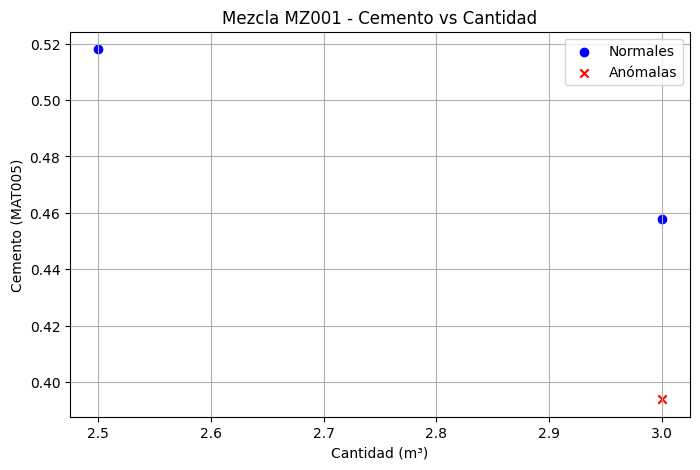

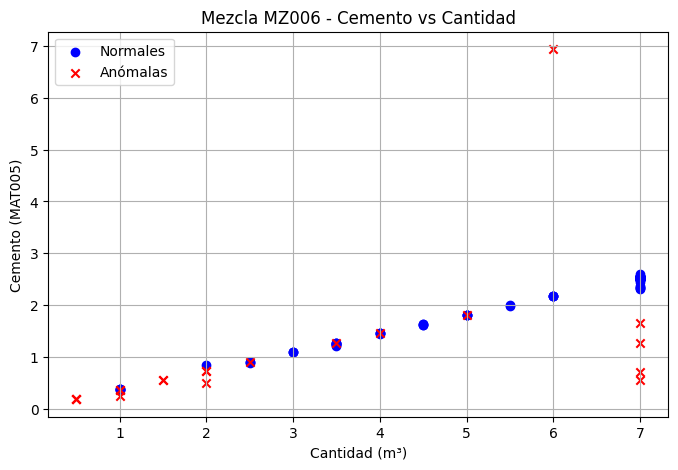

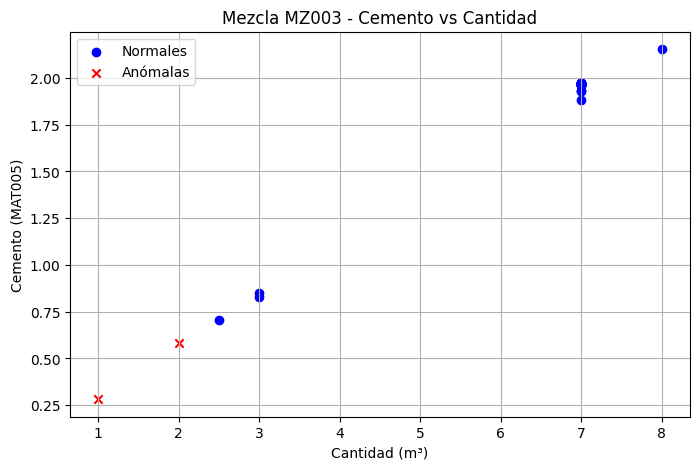

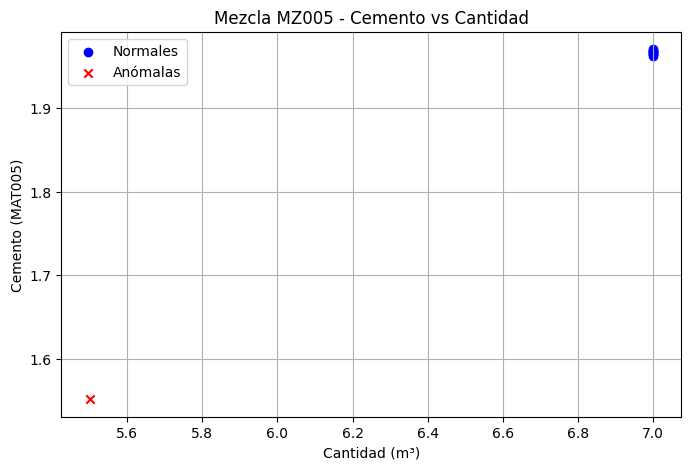

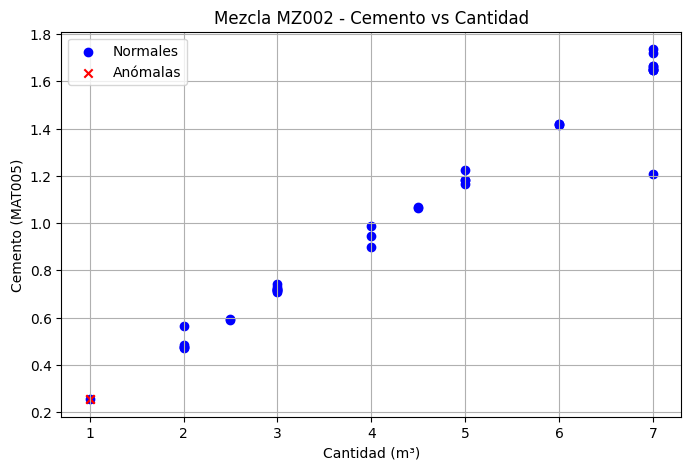

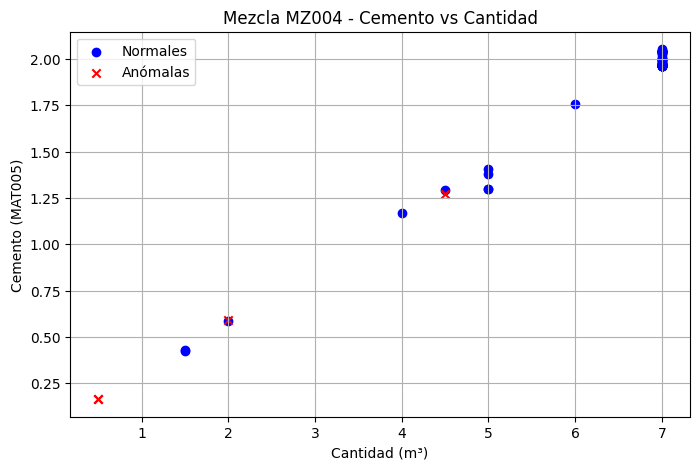

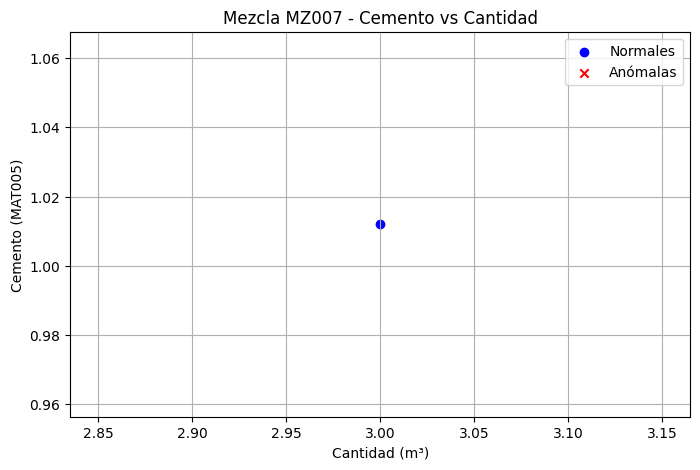

In [36]:
for mezcla in mezclas:
    df_m = df_resultado[df_resultado["ID_MEZCLA"] == mezcla]
    normales = df_m[df_m["ANOMALO"] == 1]
    anomalas = df_m[df_m["ANOMALO"] == -1]

    plt.figure(figsize=(8, 5))
    plt.scatter(normales["CANTIDAD_M3"], normales["MAT005"], c='blue', label='Normales')
    plt.scatter(anomalas["CANTIDAD_M3"], anomalas["MAT005"], c='red', label='Anómalas', marker='x')

    plt.title(f"Mezcla {mezcla} - Cemento vs Cantidad")
    plt.xlabel("Cantidad (m³)")
    plt.ylabel("Cemento (MAT005)")
    plt.legend()
    plt.grid(True)
    plt.show()